In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### NEED TO PREDICT SELLING PRICE

#### DATA CLEANING

In [6]:
data.isnull().sum() # no missing data

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
# for present price
q3=data.Present_Price.quantile(0.75)
q1=data.Present_Price.quantile(0.25)
iqr=q3-q1
upper_range=q3+1.5*iqr
lower_range=q1-1.5*iqr
print(lower_range,upper_range) # no outliers

-11.850000000000001 22.950000000000003


In [14]:
# for kms_driven
q3=data.Kms_Driven.quantile(0.75)
q1=data.Kms_Driven.quantile(0.25)
iqr=q3-q1
upper_range=q3+1.5*iqr
lower_range=q1-1.5*iqr
print(lower_range,upper_range)

-35650.5 99417.5


<AxesSubplot:>

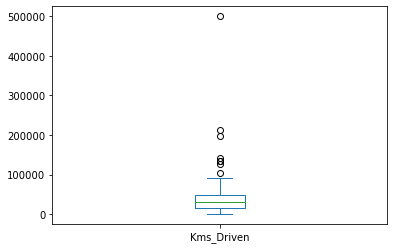

In [16]:
data["Kms_Driven"].plot(kind="box") # there are some outliers

In [17]:
data.loc[data["Kms_Driven"]>99417.5,:]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


1. as we see, as Year(car brought) is earlier, Kms driven increases 
2. so no need to remove the outliers or transform

#### Encoding Categorical data into Numerical data

In [18]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [19]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [20]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [22]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [23]:
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [24]:
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

#### Plotting

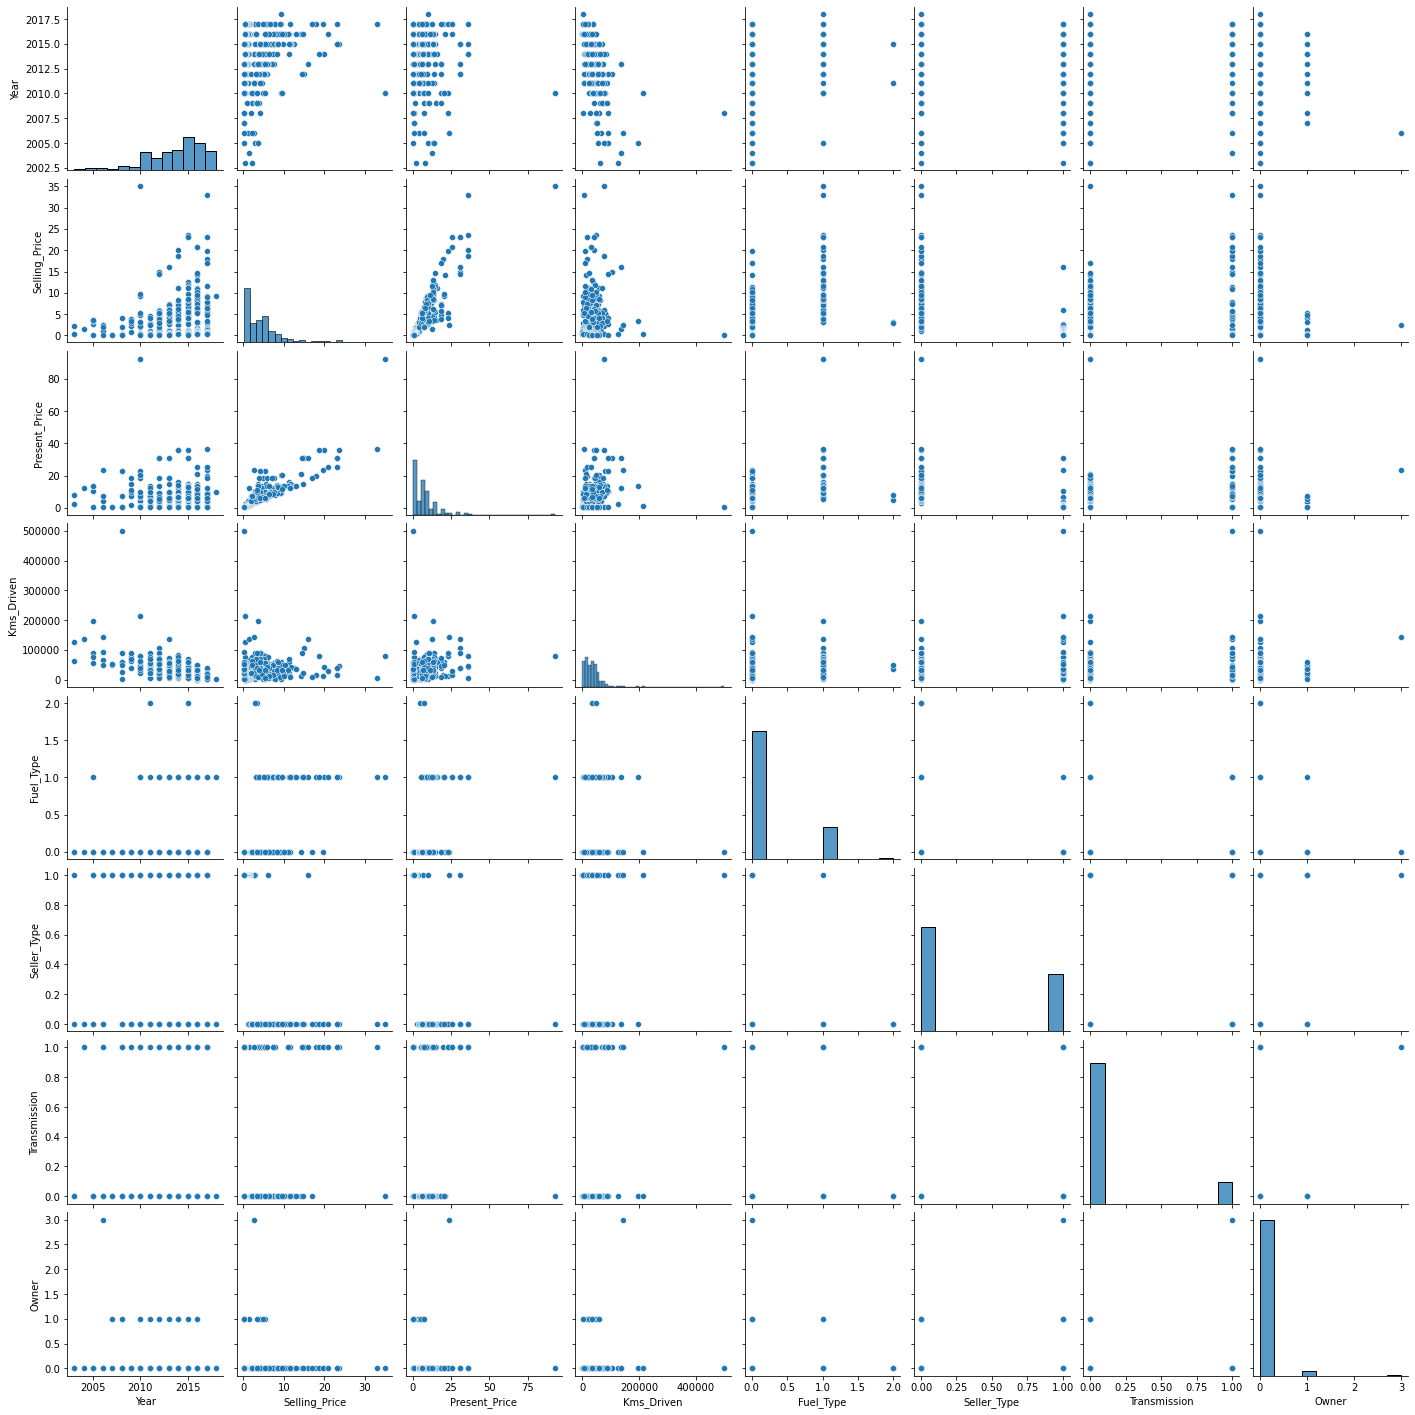

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

In [37]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


1. as we see, Present_Price is having good correlation with Selling_Price
2. Fuel_Type, Transmission, Year shows positive linear relationship
3. Kms_driven, owner does not show any linear relationship
4. Seller_Type shows negative linear relationship

#### Splitting of data

In [27]:
X=data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [28]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#### Model Selection

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [32]:
linear_regression.intercept_

-813.7985602081543

In [34]:
linear_regression.coef_

array([ 4.04550491e-01,  5.25729824e-01, -3.41873291e-06,  1.09392802e+00,
       -7.39005115e-01,  9.10110798e-01, -1.22999341e+00])

#### Model Evaluation

In [40]:
model_prediction=linear_regression.predict(X_test)

In [41]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,model_prediction)
print(r2_score)

0.8109939987105512


#### Actual prices vs predicted prices

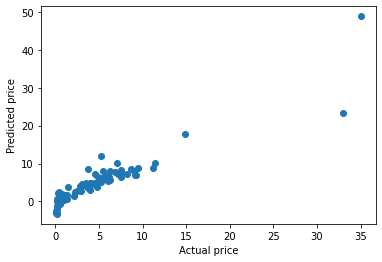

In [43]:
plt.scatter(y_test,model_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()